# Project 2
### CS 5/7394 - Applied Machine Learning
#### Sofia Murillo, Randolph Rankin

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- **[Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)** *(Selected Dataset)*

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section. 

In [1]:
# "Import libraries"

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

import warnings
warnings.filterwarnings('ignore')

style.use('seaborn')

In [2]:
# "Load original Data (which ever one you chose from the provided list) into a data frame."
original_data = pd.read_csv('data/combined_data.csv')

# "Load your additional data set(s) into a data frame."
additional_data = pd.read_excel('data/all-leaguetables.xlsx') 

#### Data Explanation

**Primary Dataset**

Our primary dataset consists of match-level data for 5 top soccer (football) leagues. Data for each match is related to scores and specific game statistics relevant to each match such as ball possession and penalties. This dataset provides insight to overall match statistics.

In [3]:
original_data.head()

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,...,20.0,4.0,0.0,0.0,1,2,2,1,2014,english
1,1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,...,9.0,1.0,0.0,0.0,2,2,2,2,2014,english
2,2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,...,10.0,1.0,0.0,0.0,2,2,2,2,2014,english
3,3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,...,10.0,0.0,0.0,1.0,0,1,1,0,2014,english
4,4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,...,10.0,2.0,0.0,0.0,0,1,1,0,2014,english


**Additional Dataset**

Our additional dataset contains data pertaining to season-level record data for several football leagues. This data itself contains the statistics related to a team's performance over a given season, including total wins/draws/losses, league rankings, and cumulative goals scored. The dataset provides insight into the overall performance of each team in a given season.

In [4]:
additional_data.head()

,League,Season,Position,Team,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDiff,FinalPoints
0,Premier League,2015/16,2,Arsenal,38,20,11,7,65,36,29,71
1,Premier League,2015/16,20,Aston Villa,38,3,8,27,27,76,-49,17
2,Premier League,2015/16,16,Bournemouth,38,11,9,18,45,67,-22,42
3,Premier League,2015/16,10,Chelsea,38,12,14,12,59,53,6,50
4,Premier League,2015/16,15,Crystal Palace,38,11,9,18,39,51,-12,42


### Questions Guiding Our Exploration

1. Are match statistics good indicators of a team's performance in the future?
2. Does a correlation exist between a team's season ranking and certain match statistics?
3. Are match wins truly influenced by stats, or are there external conditions that cannot be found within the data?
4. Can the relative "excitement" of a match along with a home team advantage predict a team's performance?

### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp. 

#### Describing the Original Dataset

By previewing our dataframe and calling `DataFrame.info()`, we can see each variable's datatype as well as any missing variables, along with gaining an understanding of the size of our data.

In [5]:
original_data.head()

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,...,20.0,4.0,0.0,0.0,1,2,2,1,2014,english
1,1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,...,9.0,1.0,0.0,0.0,2,2,2,2,2014,english
2,2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,...,10.0,1.0,0.0,0.0,2,2,2,2,2014,english
3,3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,...,10.0,0.0,0.0,1.0,0,1,1,0,2014,english
4,4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,...,10.0,2.0,0.0,0.0,0,1,1,0,2014,english


In [6]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12062 entries, 0 to 12061
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     12062 non-null  int64  
 1   Home Team                      12062 non-null  object 
 2   Away Team                      12062 non-null  object 
 3   Score                          12062 non-null  object 
 4   Half Time Score                12062 non-null  object 
 5   Match Excitement               12062 non-null  float64
 6   Home Team Rating               12062 non-null  float64
 7   Away Team Rating               12062 non-null  float64
 8   Home Team Possession %         12062 non-null  int64  
 9   Away Team Possession %         12062 non-null  int64  
 10  Home Team Off Target Shots     12062 non-null  float64
 11  Home Team On Target Shots      12062 non-null  float64
 12  Home Team Total Shots          12062 non-null 

Data is accounted for in each row of our dataframe, suggesting no missing values.

In [7]:
original_data['year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020])

The timeframe for our match-level data spans from 2014-2020

In [8]:
# Obtain the number of teams and home matches contained in our primary dataset
original_data['Home Team'].value_counts()

MAN UTD       133
SAMPDORIA     133
MAN CITY      133
VALENCIA      133
FIORENTINA    133
             ... 
NÜRNBERG       17
DARMSTADT      17
PADERBORN      17
BIELEFELD      17
INGOLSTADT     17
Name: Home Team, Length: 146, dtype: int64

From here, we can see that there is a total of 146 teams within the original dataset, each of which playing between 17 and 133 home matches over the 7 years of data.

In [9]:
# Check that the teams contained in the "away" column match the teams in the "home" column

not False in original_data['Away Team'].sort_values().unique() == original_data['Home Team'].sort_values().unique()

True

By checking that the unique lists of both Home and Away team columns are equivalent, we can confirm that all 146 teams are accounted for as both home and away teams in this dataset. This allows us the assumption that a unique list of either column is the complete list of all teams.

#### Describing the Additional Dataset

Again, we'll preview our data and use `DataFrame.info()` to explore the variables contained in our season-level record data.

In [10]:
additional_data.head()

,League,Season,Position,Team,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDiff,FinalPoints
0,Premier League,2015/16,2,Arsenal,38,20,11,7,65,36,29,71
1,Premier League,2015/16,20,Aston Villa,38,3,8,27,27,76,-49,17
2,Premier League,2015/16,16,Bournemouth,38,11,9,18,45,67,-22,42
3,Premier League,2015/16,10,Chelsea,38,12,14,12,59,53,6,50
4,Premier League,2015/16,15,Crystal Palace,38,11,9,18,39,51,-12,42


In [11]:
additional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   League         399 non-null    object
 1   Season         399 non-null    object
 2   Position       399 non-null    object
 3   Team           399 non-null    object
 4   Matches        399 non-null    int64 
 5   Wins           399 non-null    int64 
 6   Draws          399 non-null    int64 
 7   Losses         399 non-null    int64 
 8   GoalsScored    399 non-null    int64 
 9   GoalsConceded  399 non-null    int64 
 10  GoalDiff       399 non-null    int64 
 11  FinalPoints    399 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 37.5+ KB


As with the primary dataset, no values appear to be missing from any row.

In [12]:
additional_data['Season'].unique()

array(['2015/16', '2016/17', '2017/18', '2018/19', '2019/20', 2015, 2016,
       2017, 2018, 2019], dtype=object)

Data in our season-level data ranges from 2015 to 2019.

In [13]:
additional_data['Team'].value_counts()

Arsenal             5
Bayer Leverkusen    5
Chicago Fire        5
Real Madrid         5
Real Sociedad       5
                   ..
FC Union Berlin     1
SD Huesca           1
RCD Mallorca        1
FC Nurnberg         1
FC Cincinnati       1
Name: Team, Length: 104, dtype: int64

Exploring this second dataset, we see a different number of teams reported. This informs us that league data will need to be reconciled between the two datasets during our cleaning process.

### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable. 

#### Data Dictionary - Original Data

| Variable                                   | Type                                    | Description                                                                                                                      |
|--------------------------------------------|-----------------------------------------|----------------------------------------------------------------------------------------------------------------------------------|
| `Home Team`                                | Categorical (Nominal)                   | Name of the hosting team                                                                                                         |
| `Away Team`                                | Categorical (Nominal)                   | Name of the visiting team                                                                                                        |
| `Score`                                    | Numerical (Discrete, Compound Variable) | Final score of the match, delimited by a hyphen, with the home team score on the left side, and the away team score on the right |
| `Half Time Score`                          | Numerical (Discrete, Compound Variable) | Similar to the score variable, but representing the score after the first half                                                   |
| `Match Excitement`                         | Numerical (Continuous)                  | Index calculated between 0 and 10 based on game statistics that would indicate an "exciting" match                               |
| `Home`/`Away Team Rating`                  | Numerical (Continuous)                  | Index representing relative performance of a team prior to a match                                                               |
| `Home`/`Away Team Possession %`            | Numerical (Discrete*)                   | Percentage of total gameplay time for which the team had control of the ball                                                     |
| `Home`/`Away Team Off Target Shots`        | Numerical (Discrete)                    | Total off target shots taken by a team                                                                                           |
| `Home`/`Away Team On Target Shots`         | Numerical (Discrete)                    | Total on target shots taken by a team                                                                                            |
| `Home`/`Away Team Total Shots`             | Numerical (Discrete)                    | Total shots attempted by a team                                                                                                  |
| `Home`/`Away Team Blocked Shots`           | Numerical (Discrete)                    | Total shots attempted by a team that were blocked                                                                                |
| `Home`/`Away Team Corners`                 | Numerical (Discrete)                    | Total corner kicks attempted by a team                                                                                           |
| `Home`/`Away Team Throw Ins`               | Numerical (Discrete)                    | Total number of throw-ins initiated by a team                                                                                    |
| `Home`/`Away Team Pass Success %`          | Numerical (Discrete*)                   | Percentage of successful passes out of total attempted passes                                                                    |
| `Home`/`Away Team Aerials Won`             | Numerical (Discrete)                    | Number of successful aerial passes completed                                                                                     |
| `Home`/`Away Team Clearances`              | Numerical (Discrete)                    | Number of times a team cleared the ball away from their goal defensively                                                         |
| `Home`/`Away Team Fouls`                   | Numerical (Discrete)                    | Number of fouls committed by a team                                                                                              |
| `Home`/`Away Team Yellow Cards`            | Numerical (Discrete)                    | Number of yellow cards issued to a team's players                                                                                |
| `Home`/`Away Team Second Yellow Cards`     | Numerical (Discrete)                    | Number of second yellow cards issued to a team's player                                                                          |
| `Home`/`Away Team Red Cards`               | Numerical (Discrete)                    | Number of red cards issued a teams players                                                                                       |
| `Home`/`Away Team Goals Scored`            | Numerical (Discrete)                    | Number of successful goals scored by a team                                                                                      |
| `Home`/`Away Team Goals Conceeded` _(sic)_ | Numerical (Discrete)                    | Number of failed blocks of the opposing team's goal attempts                                                                     |
| `year`                                     | Categorical (Ordinal)                   | Season year during which the match occured                                                                                       |
| `league`                                   | Categorical (Nominal)                   | League of which the playing teams are members                                                                                    |

** Would otherwise be continuous, but the data is presented rounded to the nearest whole percent*

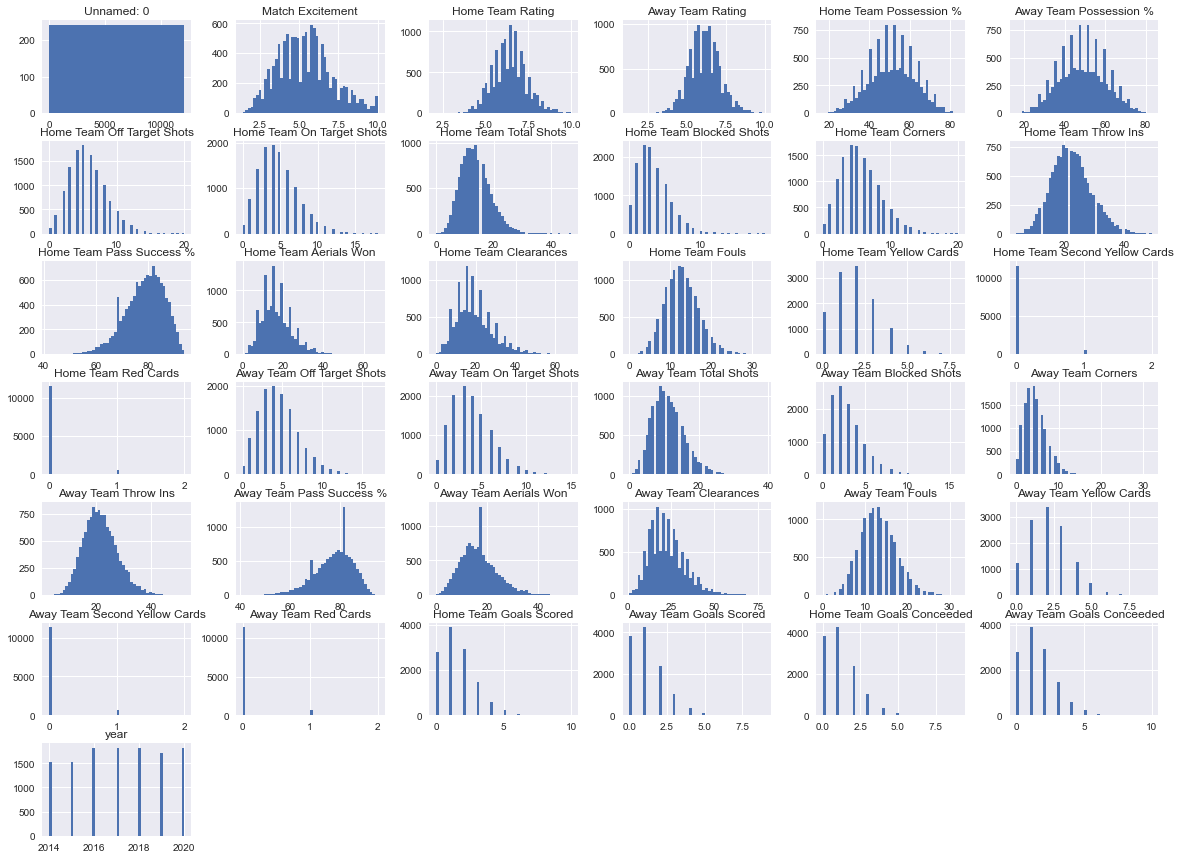

In [14]:
original_data.hist(bins=50, figsize=(20,15))
pass

#### Data Dictionary - Additional Data

| Variable        | Type                  | Description                                                                                                |
|-----------------|-----------------------|------------------------------------------------------------------------------------------------------------|
| `League`        | Categorical (Nominal) | League of which the playing teams are members                                                              |
| `Season`        | Categorical (Ordinal) | Season year for which the statistics apply                                                                 |
| `Position`      | Categorical (Ordinal) | Rank of the team amongst all teams in their league                                                         |
| `Team`          | Categorical (Nominal) | Name of the team for which the statistics apply                                                            |
| `Matches`       | Numerical (Discrete)  | Number of matches played by the team for this season                                                       |
| `Wins`          | Numerical (Discrete)  | Number of matches won by the team for this season                                                          |
| `Draws`         | Numerical (Discrete)  | Number of matches played by the team that ended in draws for this season                                   |
| `Losses`        | Numerical (Discrete)  | Number of matches lost by the team for this season                                                         |
| `GoalsScored`   | Numerical (Discrete)  | Number of total goals scored by the team for this season                                                   |
| `GoalsConceded` | Numerical (Discrete)  | Number of total goals scored against the team for this season                                              |
| `GoalDiff`      | Numerical (Discrete)  | Difference between `GoalsScored` and `GoalsConceded`                                                       |
| `FinalPoints`   | Numerical (Discrete)  | Number of aggregate points as determined by league rules regarding multiple matches between the same teams |


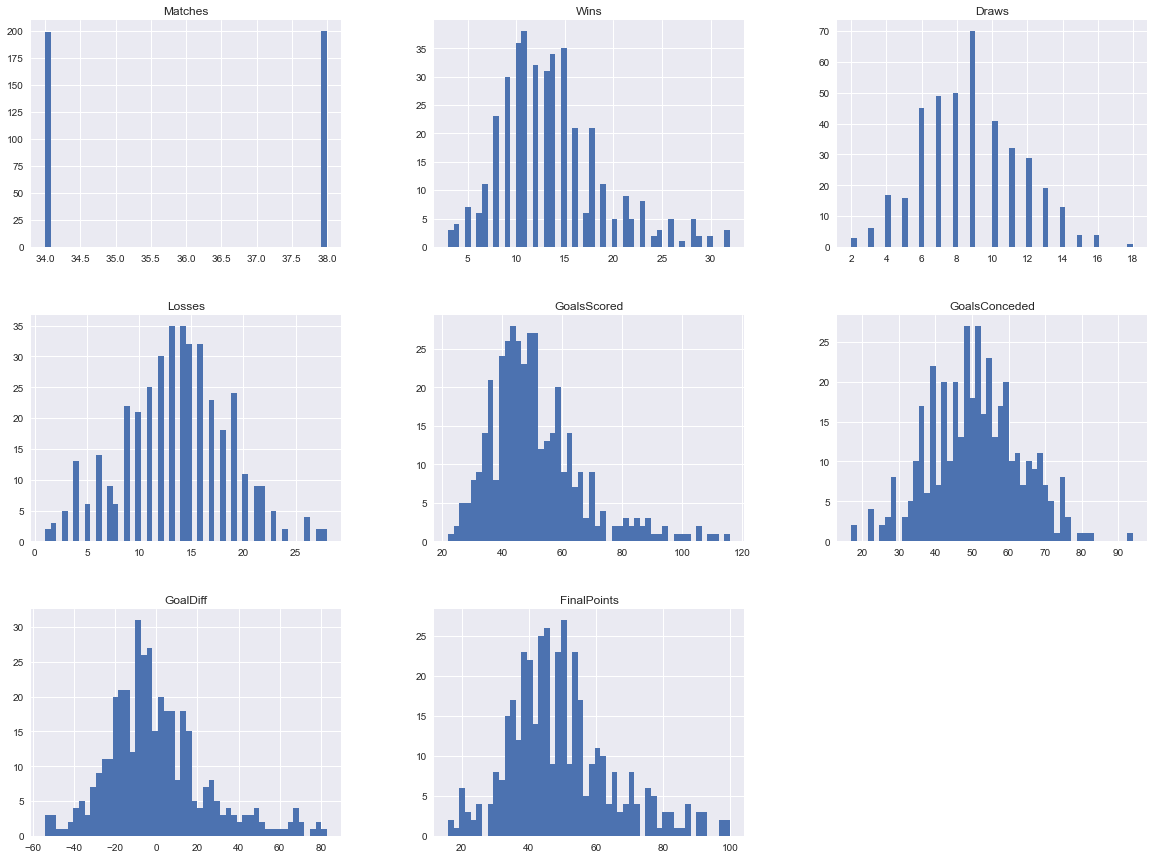

In [15]:
additional_data.hist(bins=50, figsize=(20,15))
pass

### Part 4 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies).

### Our Merging Strategy

When cleaning the data for merging, we'll take a couple of primary variables into account—the season of the match and the teams who played. We'll first isolate only the leagues for which data is common between the two sets. Then, we'll explore how we'll clean the string variables for the team names to be consistent with one another.

To verify our merge is successful, we'll calculate season records based on match wins and losses from our original data set and test that the records as calculated on a match level are consistent with the season records as reported in our additional data set. This will ensure that each merged row is consistent with the data from both sets.

### League Filtering

First, we'll want to explore which leagues are reported in each of our data.

In [16]:
original_data.league.unique()

array(['english', 'french', 'german', 'italian', 'spanish'], dtype=object)

In [17]:
additional_data.League.unique()

array(['Premier League', 'La Liga', 'Bundesliga', 'Major League Soccer'],
      dtype=object)

We see that in our additional data, we have unneeded data for Major League Soccer, while lacking data for Italian and French leagues.

In [18]:
df_orig = original_data.loc[original_data.league.isin(['english', 'german', 'spanish'])]
df_addition = additional_data.loc[additional_data.League.isin(['Premier League', 'La Liga', 'Bundesliga'])]

### Team Name Formatting

Next, we'll explore how the team names are formatted differently for data cleaning purposes.

In [19]:
df_addition.Team = df_addition.Team.apply(lambda x: str.upper(x))

Now, let's see which teams can immediately be merged...

In [20]:
# Values that are matched between datasets
df_orig['Home Team'].loc[df_orig['Home Team'].isin(df_addition.Team)].sort_values().unique()

array(['ARSENAL', 'ASTON VILLA', 'ATLETICO MADRID', 'BOURNEMOUTH',
       'BRIGHTON', 'BURNLEY', 'CHELSEA', 'CRYSTAL PALACE', 'ESPANYOL',
       'EVERTON', 'FULHAM', 'HULL CITY', 'LEICESTER CITY', 'LIVERPOOL',
       'MIDDLESBROUGH', 'RAYO VALLECANO', 'RB LEIPZIG', 'REAL MADRID',
       'REAL SOCIEDAD', 'SEVILLA FC', 'SOUTHAMPTON', 'SUNDERLAND',
       'WATFORD'], dtype=object)

... and which teams will need reformatting.

In [21]:
# Values that are unmatched in our additional data
df_addition.Team.loc[~df_addition.Team.isin(df_orig['Home Team'])].sort_values().unique()

array(['ATHLETIC BILBAO', 'BAYER LEVERKUSEN', 'BAYERN MUNICH',
       'BORUSSIA DORTMUND', 'BORUSSIA MONCHENGLADBACH', 'CA OSASUNA',
       'CARDIFF CITY', 'CD LEGANES', 'CELTA VIGO', 'DEPORTIVO ALAVES',
       'DEPORTIVO LA CORUNA', 'EINTRACHT FRANKFURT', 'FC AUGSBURG',
       'FC BARCELONA', 'FC INGOLSTADT 04', 'FC KOLN', 'FC NURNBERG',
       'FC SCHALKE 04', 'FC UNION BERLIN', 'FORTUNA DUSSELDORF',
       'FSV MAINZ 05', 'GETAFE CF', 'GIRONA FC', 'GRANADA CF',
       'HAMBURGER SV', 'HANNOVER 96', 'HERTHA BSC', 'HUDDERSFIELD TOWN',
       'LEVANTE UD', 'MALAGA CF', 'MANCHESTER CITY', 'MANCHESTER UNITED',
       'NEWCASTLE UNITED', 'NORWICH CITY', 'RCD MALLORCA',
       'REAL BETIS BALOMPIE', 'REAL VALLADOLID CF', 'SC FREIBURG',
       'SC PADERBORN 07', 'SD EIBAR', 'SD HUESCA', 'SHEFFIELD UNITED',
       'SPORTING GIJON', 'STOKE CITY', 'SV DARMSTADT 98',
       'SV WERDER BREMEN', 'SWANSEA CITY', 'TOTTENHAM HOTSPUR',
       'TSG 1899 HOFFENHEIM', 'UD LAS PALMAS', 'VALENCIA CF',
   

In [22]:
# Values that are unmatched in our original data
df_orig['Home Team'].loc[~df_orig['Home Team'].isin(df_addition.Team)].sort_values().unique()

array(['1. FC KÖLN', 'ALAVÉS', 'ALMERÍA', 'ATHLETIC', 'AUGSBURG',
       'BARCELONA', 'BAYERN', 'BIELEFELD', 'CARDIFF', 'CELTA', 'CÁDIZ CF',
       'CÓRDOBA', 'DARMSTADT', 'DEPORTIVO', 'DORTMUND', 'DÜSSELDORF',
       'EIBAR', 'ELCHE', 'FRANKFURT', 'FREIBURG', 'GETAFE', 'GIJÓN',
       'GIRONA', 'GRANADA', 'HANNOVER', 'HERTHA', 'HOFFENHEIM', 'HSV',
       'HUDDERSFIELD', 'HUESCA', 'INGOLSTADT', 'LAS PALMAS', 'LEEDS UTD',
       'LEGANÉS', 'LEVANTE', 'LEVERKUSEN', "M'GLADBACH", 'MAINZ',
       'MALLORCA', 'MAN CITY', 'MAN UTD', 'MÁLAGA', 'NEWCASTLE',
       'NORWICH', 'NÜRNBERG', 'OSASUNA', 'PADERBORN', 'QPR', 'REAL BETIS',
       'SCHALKE', 'SHEFFIELD UTD', 'STOKE', 'STUTTGART', 'SWANSEA',
       'TOTTENHAM', 'UNION BERLIN', 'VALENCIA', 'VALLADOLID',
       'VILLARREAL', 'W. BREMEN', 'WEST BROM', 'WEST HAM', 'WOLFSBURG',
       'WOLVES'], dtype=object)

For our mismatched team names, we'll replace the names in our additional dataset to match the formatting of our base dataset.

In [23]:
# Dictionary mapping current team name in additional data set to corresponding name in original dataset
team_name_key = {
    'ATHLETIC BILBAO': 'ATHLETIC',
    'BAYER LEVERKUSEN': 'LEVERKUSEN',
    'BAYERN MUNICH': 'BAYERN',
    'BORUSSIA DORTMUND': 'DORTMUND',
    'BORUSSIA MONCHENGLADBACH': "M'GLADBACH",
    'CA OSASUNA': 'OSASUNA',
    'CARDIFF CITY': 'CARDIFF',
    'CD LEGANES': 'LEGANÉS',
    'CELTA VIGO': 'CELTA',
    'DEPORTIVO ALAVES': 'ALAVÉS',
    'DEPORTIVO LA CORUNA': 'DEPORTIVO',
    'EINTRACHT FRANKFURT': 'FRANKFURT',
    'FC AUGSBURG': 'AUGSBURG',
    'FC BARCELONA': 'BARCELONA',
    'FC INGOLSTADT 04': 'INGOLSTADT',
    'FC KOLN': '1. FC KÖLN',
    'FC NURNBERG': 'NÜRNBERG',
    'FC SCHALKE 04': 'SCHALKE',
    'FC UNION BERLIN': 'UNION BERLIN',
    'FORTUNA DUSSELDORF': 'DÜSSELDORF',
    'FSV MAINZ 05': 'MAINZ',
    'GETAFE CF': 'GETAFE',
    'GIRONA FC': 'GIRONA',
    'GRANADA CF': 'GRANADA',
    'HAMBURGER SV': 'HSV',
    'HANNOVER 96': 'HANNOVER',
    'HERTHA BSC': 'HERTHA',
    'HUDDERSFIELD TOWN': 'HUDDERSFIELD',
    'LEVANTE UD': 'LEVANTE',
    'MALAGA CF': 'MÁLAGA',
    'MANCHESTER CITY': 'MAN CITY',
    'MANCHESTER UNITED': 'MAN UTD',
    'NEWCASTLE UNITED': 'NEWCASTLE',
    'NORWICH CITY': 'NORWICH',
    'RCD MALLORCA': 'MALLORCA',
    'REAL BETIS BALOMPIE': 'REAL BETIS',
    'REAL VALLADOLID CF': 'VALLADOLID',
    'SC FREIBURG': 'FREIBURG',
    'SC PADERBORN 07': 'PADERBORN',
    'SD EIBAR': 'EIBAR',
    'SD HUESCA': 'HUESCA',
    'SHEFFIELD UNITED': 'SHEFFIELD UTD',
    'SPORTING GIJON': 'GIJÓN',
    'STOKE CITY': 'STOKE',
    'SV DARMSTADT 98': 'DARMSTADT',
    'SV WERDER BREMEN': 'W. BREMEN',
    'SWANSEA CITY': 'SWANSEA',
    'TOTTENHAM HOTSPUR': 'TOTTENHAM',
    'TSG 1899 HOFFENHEIM': 'HOFFENHEIM',
    'UD LAS PALMAS': 'LAS PALMAS',
    'VALENCIA CF': 'VALENCIA',
    'VFB STUTTGART': 'STUTTGART',
    'VFL WOLFSBURG': 'WOLFSBURG',
    'VILLARREAL CF': 'VILLARREAL',
    'WEST BROMWICH ALBION': 'WEST BROM',
    'WEST HAM UNITED': 'WEST HAM',
    'WOLVERHAMPTON WANDERERS': 'WOLVES'
}

In [24]:
# Replace all values in additional set with team names as formatted in original set
for k, v in team_name_key.items():
    df_addition.replace(k, v, inplace=True)

# Verify that all rows now have equivalent team names in the original set
df_addition.loc[~df_addition.Team.isin(df_orig['Home Team'])].empty

True

With our renaming successful, we've now accounted for each team in our additional dataset to match with its corresponding format in the original dataset.

### Merge Preparation and Verification

To prepare to verify our two datasets are consistent for merging, we'll add calculated columns containing win data to our original dataset. This will be helpful to check season records against match level data.

In [25]:
# Add booleans for wins, losses, and draws based on the original dataset
df_orig['home_team_win'] = df_orig['Home Team Goals Scored'] > df_orig['Away Team Goals Scored']
df_orig['away_team_win'] = df_orig['Home Team Goals Scored'] < df_orig['Away Team Goals Scored']
df_orig['draw'] = df_orig['Home Team Goals Scored'] == df_orig['Away Team Goals Scored']
df_orig[['Score', 'home_team_win', 'away_team_win', 'draw']].head()

,Score,home_team_win,away_team_win,draw
0,1-2,False,True,False
1,2-2,False,False,True
2,2-2,False,False,True
3,0-1,False,True,False
4,0-1,False,True,False


To ensure we're merging team data on the correct season, we'll use our calculated wins, losses, and draws to assert our data is consistent between the datasets

In [26]:
# Isolate only seasons and teams located in both datasets
years = [year for year in df_orig.year.unique() if str(year) in df_addition.Season.apply(lambda x: x.split('/')[0]).unique()]
teams = [team for team in df_orig['Home Team'].unique() if team in df_addition.Team.unique()]

# Iterate for each datapoint to check that our match win data is consistent between datasets
for year in years:
    for team in teams:
        # Obtain all matches played by a particular team in a particular season
        orig_team_df = df_orig.loc[((df_orig['Home Team'] == team) | (df_orig['Away Team'] == team)) & (df_orig.year == year)]

        # Determine number of matches played
        orig_num_games = len(orig_team_df)

        # Go ahead and break this iteration if no data is available for this team in this season
        if not orig_num_games:
            continue

        # Determine number of wins based on match data
        orig_num_win = len(orig_team_df.loc[(orig_team_df['Home Team'] == team) & orig_team_df.home_team_win]) + len(orig_team_df.loc[(orig_team_df['Away Team'] == team) & orig_team_df.away_team_win])

        # Determine number of losses based on match data
        orig_num_loss = len(orig_team_df.loc[(orig_team_df['Home Team'] == team) & orig_team_df.away_team_win]) + len(orig_team_df.loc[(df_orig['Away Team'] == team) & orig_team_df.home_team_win])

        # Determine number of draws based on match data
        orig_num_draw = len(orig_team_df.loc[df_orig.draw])

        # Isolate corresponding row in the additional dataset
        additional_row = df_addition.loc[(df_addition.Team == team) & (df_addition.Season.apply(lambda x: x.split('/')[0]) == str(year))].iloc[0]

        # Test assertions that our calculations are consistent with the additional data
        try:
            assert orig_num_games == additional_row.Matches
            assert orig_num_win == additional_row.Wins
            assert orig_num_loss == additional_row.Losses
            assert orig_num_draw == additional_row.Draws
        except AssertionError:
            print(f'Mismatch for {team} in season {year}')


Because the exception block does not execute, we've confirmed that these data are consistent and can continue to merge.

### Completing the Merge

To begin, we'll isolate the variables we'd like to merge with our original data set and reformat the season column.

In [27]:
# Drop the league column and reformat the season column to match original dataset
df_addition.drop('League', axis=1, inplace=True)
df_addition.Season = df_addition.Season.apply(lambda x: int(x.split('/')[0]))

Now, we'll create two copies of the data frame to merge season record data on both home and away teams

In [28]:
# Create two copies of the dataframe to contain columns for Home and Away teams
home_season_record = df_addition.copy()
away_season_record = df_addition.copy()

In [29]:
# Rename the columns of both dataframe copies to be more informative alongside the original data
for df, var in [(home_season_record, 'Home'), (away_season_record, 'Away')]:
    cols = {
        'Season': 'year',
        'Position': f'{var} Team Season Position',
        'Team': f'{var} Team',
        'Matches': f'{var} Team Season Matches Played',
        'Wins': f'{var} Team Season Wins',
        'Draws': f'{var} Team Season Draws',
        'Losses': f'{var} Team Season Losses',
        'GoalsScored': f'{var} Team Season Goals Scored',
        'GoalsConceded': f'{var} Team Season Goals Conceded',
        'GoalDiff': f'{var} Team Season Goal Difference',
        'FinalPoints': f'{var} Team Season Final Points'
    }
    df.rename(columns=cols, inplace=True)

Finally, we'll create our merged dataset containing season record data for both teams in each match.

In [30]:
# Merge data for both Home and Away teams
df_merged = df_orig.merge(home_season_record, on=['year', 'Home Team']).merge(away_season_record, on=['year', 'Away Team'])
df_merged.head()

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Home Team Season Final Points,Away Team Season Position,Away Team Season Matches Played,Away Team Season Wins,Away Team Season Draws,Away Team Season Losses,Away Team Season Goals Scored,Away Team Season Goals Conceded,Away Team Season Goal Difference,Away Team Season Final Points
0,380,MAN UTD,TOTTENHAM,1-0,1-0,3.1,6.8,6.4,50,50,...,66,3,38,19,13,6,69,35,34,70
1,579,EVERTON,TOTTENHAM,1-1,1-1,5.4,6.7,6.7,41,59,...,47,3,38,19,13,6,69,35,34,70
2,611,NORWICH,TOTTENHAM,0-3,0-2,6.4,4.9,7.7,46,54,...,34,3,38,19,13,6,69,35,34,70
3,403,LEICESTER CITY,TOTTENHAM,1-1,0-0,5.6,6.4,6.4,35,65,...,81,3,38,19,13,6,69,35,34,70
4,478,BOURNEMOUTH,TOTTENHAM,1-5,1-3,6.5,4.6,8.7,46,54,...,42,3,38,19,13,6,69,35,34,70


In [31]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5024 entries, 0 to 5023
Data columns (total 63 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        5024 non-null   int64  
 1   Home Team                         5024 non-null   object 
 2   Away Team                         5024 non-null   object 
 3   Score                             5024 non-null   object 
 4   Half Time Score                   5024 non-null   object 
 5   Match Excitement                  5024 non-null   float64
 6   Home Team Rating                  5024 non-null   float64
 7   Away Team Rating                  5024 non-null   float64
 8   Home Team Possession %            5024 non-null   int64  
 9   Away Team Possession %            5024 non-null   int64  
 10  Home Team Off Target Shots        5024 non-null   float64
 11  Home Team On Target Shots         5024 non-null   float64
 12  Home T

Now, we've accumulated a single dataframe containing both match data alongside season records for both home and away teams.

### Part 5 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 

**Relationship 1**: Average difference in possession as a predictor for season ranking

> **Predictor variable**: $\frac{\sum_{j=1}^k(2P_j-100)}{k}$ where $P_j$ represents a team's possession percentage on $[0,\ 100]$ percent of the $j$th game of $k$ games in a given season.
>
> **Target variable**: $1-\frac{R}{L}$ where $R$ represents a team's season rank out of $L$ total ranked teams in their league.
>
> **Explanation**: With this relationship, we wish to explore whether a team's tendency to play more offensively or defensively (positive and negative average difference of possession, respectively) influences the team's final position of the league's rankings.

In [32]:
# Obtain individual team match statistics agnostic of home vs. away
df_1 = df_merged[['year', 'league', 'Home Team', 'Home Team Possession %', 'Home Team Season Position']]
df_2 = df_merged[['year', 'league', 'Away Team', 'Away Team Possession %', 'Away Team Season Position']]
for df, var in [(df_1, 'Home'), (df_2, 'Away')]:
    df.rename(
        columns={
            f'{var} Team': 'team',
            f'{var} Team Possession %': 'possession_pct',
            f'{var} Team Season Position': 'season_rank'
        },
        inplace=True
    )

# Concatenate the team statistics together and calculate difference in ball possession
df_comb = pd.concat([df_1, df_2])
df_comb.season_rank = df_comb.season_rank.apply(lambda x: int(x))
df_comb['pos_diff'] = 2 * df_comb.possession_pct - 100

# Group by team and season to obtain average possession differences
df_comb = df_comb.drop('possession_pct', axis=1).groupby(['year', 'league', 'team']).mean().reset_index()

# Calculate rank percentile
max_rank = df_comb[['year', 'league', 'season_rank']].groupby(['year', 'league']).max()
df_comb['pctile'] = pd.Series([1 - v.season_rank / max_rank.loc[v.year, v.league].season_rank for _, v in df_comb.iterrows()])

df_comb.head()

,year,league,team,season_rank,pos_diff,pctile
0,2015,english,ARSENAL,2.0,16.631579,0.90
1,2015,english,ASTON VILLA,20.0,-7.263158,0.00
2,2015,english,BOURNEMOUTH,16.0,2.421053,0.20
3,2015,english,CHELSEA,10.0,12.315789,0.50
4,2015,english,CRYSTAL PALACE,15.0,-8.421053,0.25


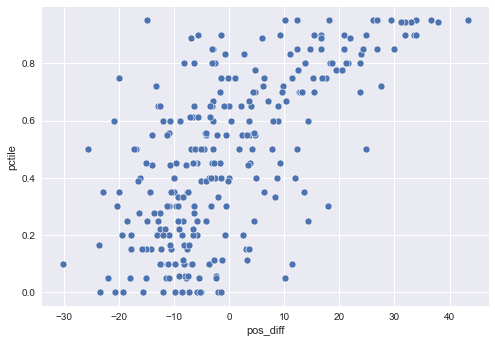

In [33]:
# Plot average possession difference vs. overall season rank percentile

sns.scatterplot(x=df_comb.pos_diff, y=df_comb.pctile)
pass

This plot demonstrates the relationship between a team's gameplay style on the x-axis (with negative values being mostly defensive during a season and positive values being mostly offensive during a season), and a team's percentile rank at the end of the season.

From the plot, we see a fairly strong positive correlation indicating that teams who control the ball for more gameplay during a season have a better likelihood of performing well in their league. Conversely, teams who play mostly defensively during a season rank poorly among other teams in their league.

**Relationship 2**: Season Performance for Relative Match Excitement

> **Predictor variable**: End-of-Season Ranking
>
> **Target variable**: Match Excitement
>
> **Explanation**: With this relationship, we wish to explore whether the season rank of a team generates more match excitement.

In [34]:
# Obtain individual team match statistics agnostic of home vs. away
df_3 = df_merged[['year', 'Home Team', 'Match Excitement', 'Home Team Season Position']]
df_4 = df_merged[['year', 'Away Team', 'Match Excitement', 'Away Team Season Position']]
for df, var in [(df_3, 'Home'), (df_4, 'Away')]:
    df.rename(
        columns={
            f'{var} Team': 'team',
            f'{var} Team Season Position': 'season_rank'
        },
        inplace=True
    )


# Concatenate the team statistics together
df_comb = pd.concat([df_3, df_4])

# Rename match excitement and convert season rank to int datatype (used to be as string)
df_comb.rename(columns={'Match Excitement': 'match_excitement'}, inplace=True)
df_comb['season_rank'] = df_comb['season_rank'].astype(int)
df_comb

df_comb.groupby(['team', 'year']).mean().reset_index().drop(['team', 'year'], axis=1)

# Sort the dataframe by the season rank
df_comb = df_comb.sort_values(by='season_rank')
df_comb.head()


,year,team,match_excitement,season_rank
2359,2017,BAYERN,8.7,1
3517,2016,REAL MADRID,9.6,1
4080,2017,BARCELONA,7.5,1
4465,2018,BARCELONA,4.3,1
3312,2015,BARCELONA,3.8,1


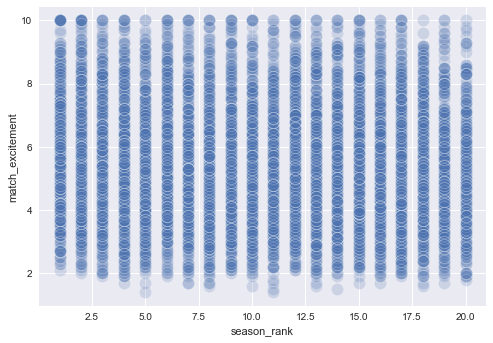

In [35]:
# Create a scatterplot showing the relation between season rank and match excitement
sns.scatterplot(data=df_comb, x="season_rank", y="match_excitement", alpha=0.2, s=150)
pass

After analyzing this scatterplot, we came to the conclusion that there is no direct correlation between the ranking of a team and the excitement generated during a match. This could be due to a variety of reasons, such as the crowd rooting for underdogs or players being transferred to lower ranking teams. Overall, this proves that our hypothesis related to match excitement being generated by ranking was incorrect.

**Relationship 3**: Fouls, Yellow, and Red Cards Collected for End-of-Season Rank

> **Predictor variable**: The "Aggressive Score" which is an aggregate score of fouls, yellow cards, second yellow cards, and red cards, each representing a differing magnitude of offense.
>
> **Target variable**: The End-of-Season Rank of a team within their respective league.
>
> **Explanation**: With this relationship, we wish to explore whether the total quantity of yellow, second-yellow, red cards, and fouls collected throughout a season affects a team's final rank. The driving question as we explore this relationship is whether having aggressive players on a team drives season 
performance.

In [36]:
# Obtain individual team match statistics agnostic of home vs. away
df_5 = df_merged[['Home Team', 'Home Team Yellow Cards', 'Home Team Second Yellow Cards', 'Home Team Red Cards', 'Home Team Fouls', 'Home Team Season Position']]
df_6 = df_merged[['Away Team', 'Away Team Yellow Cards', 'Away Team Second Yellow Cards', 'Away Team Red Cards', 'Away Team Fouls', 'Away Team Season Position']]

for df, var in [(df_5, 'Home'), (df_6, 'Away')]:
    df.rename(
        columns={
            f'{var} Team': 'team',
            f'{var} Team Season Position': 'season_rank',
            f'{var} Team Yellow Cards': 'yellow_cards',
            f'{var} Team Second Yellow Cards': 'second_yellow_cards',
            f'{var} Team Red Cards': 'red_cards',
            f'{var} Team Fouls': 'fouls',
        },
        inplace=True
    )

# Concatenate the team statistics together 
df_comb = pd.concat([df_5, df_6])
df_comb['season_rank'] = df_comb['season_rank'].astype(int)

df_comb['aggressive_score'] = df_comb['fouls'] + 2 * df_comb['yellow_cards'] + 3 * df_comb['second_yellow_cards'] + 4 * df_comb['red_cards']

df_comb.sort_values(by='aggressive_score', ascending=False)

,team,yellow_cards,second_yellow_cards,red_cards,fouls,season_rank,aggressive_score
3322,GETAFE,8.0,0.0,1.0,27.0,19,47.0
4067,ALAVÉS,7.0,0.0,0.0,29.0,14,43.0
1986,FRANKFURT,5.0,0.0,1.0,28.0,11,42.0
4423,GETAFE,7.0,0.0,0.0,28.0,5,42.0
4428,GETAFE,5.0,2.0,0.0,26.0,5,42.0
...,...,...,...,...,...,...,...
947,TOTTENHAM,0.0,0.0,0.0,2.0,3,2.0
4486,ATLETICO MADRID,0.0,0.0,0.0,1.0,2,1.0
1589,LEICESTER CITY,0.0,0.0,0.0,1.0,5,1.0
1784,CHELSEA,0.0,0.0,0.0,0.0,4,0.0


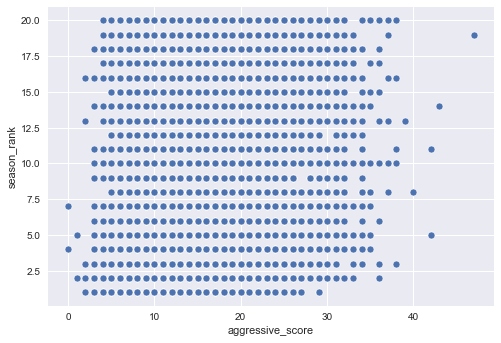

In [37]:
# Create scatterplot showing the relationship between how the aggressiveness of a team affects their overall season rank
sns.scatterplot(data=df_comb, x="aggressive_score", y="season_rank")
pass

From this scatterplot, we can see that there is no clear pattern between aggressiveness of a team and their final season ranking. However, notably, some higher ranked teams tend to have a rather high "Aggressive Score". Since a lot of the lower ranking teams are centralized in the 15-25 Aggressive Score range, it appears that teams outside of this ranges perform either have high or low performance.

**Relationship 4**: A team's rating as a predictor for match win.

> **Predictor variable**: The difference in two teams' ratings as determined by previous gameplay.
>
> **Target variable**: The result of the game—either win, lose, or draw.
>
> **Explanation**: With this relationship, we seek to determine if a team's previous performance as summarized by their rating is indicative of their likelihood of winning a match.

In [38]:
# Obtain relevant columns
df_1 = df_merged[['Home Team Rating', 'Away Team Rating', 'home_team_win', 'away_team_win', 'draw']]
df_2 = df_merged[['Away Team Rating', 'Home Team Rating', 'away_team_win', 'home_team_win', 'draw']]

# Reformat column names and concatinate into single dataframe
renamed_cols = ['rating', 'op_rating', 'win', 'lose', 'draw']
df_1.columns = renamed_cols
df_2.columns = renamed_cols
df_comb = pd.concat([df_1, df_2])

# Calculate difference in rating vs. opponent rating
df_comb['rating_diff'] = df_comb.rating - df_comb.op_rating
df_comb.head()

,rating,op_rating,win,lose,draw,rating_diff
0,6.8,6.4,True,False,False,0.4
1,6.7,6.7,False,False,True,0.0
2,4.9,7.7,False,True,False,-2.8
3,6.4,6.4,False,False,True,0.0
4,4.6,8.7,False,True,False,-4.1


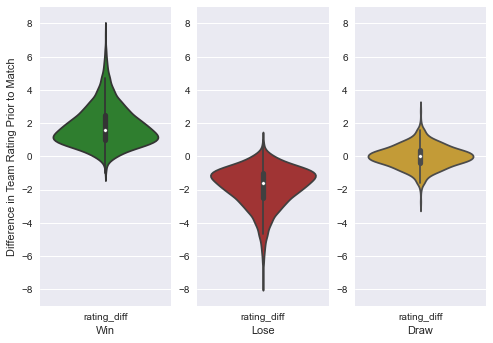

In [39]:
# Setup multiplot
fig, axs = plt.subplots(ncols=3)
axs[0].set_ylabel('Difference in Team Rating Prior to Match')
for ax in axs:
    ax.set_ylim(-9, 9)

# Plot a violin plot for wins, loses, and draws
for i, (col, color, label) in enumerate([
    (df_comb.win, 'forestgreen', 'Win'),
    (df_comb.lose, 'firebrick', 'Lose'),
    (df_comb.draw, 'goldenrod', 'Draw')
]):
    sns.violinplot(data=df_comb[['rating_diff']].loc[col], scale='count', ax=axs[i], color=color)
    axs[i].set_xlabel(label)

In these plots, we gain a sense of how a team's prior performance is a good indicator of their odds of winning a game. Positive differences (teams that are higher rated than their opponents) tend to win, with upset occurrences being uncommon. Interestingly, draws will most frequently occur between teams that are "evenly matched," as far as the ratings are calculated.

**Relationship 5**: Team ahead at halftime indicating winner

> **Predictor variable**: The team winning at halftime
>
> **Target variable**: The team winning the match
>
> **Explanation**: For this relationship, we'll see how often the results at halftime carry over to the results following the match

In [40]:
# Obtain relevant columns and augment dataframe to determine frequency of match outcomes
df = df_merged[['Half Time Score', 'Score']]
df.columns = ['at_half', 'final']

get_winner = lambda x: 'HOME' if x.split('-')[0] > x.split('-')[1] else 'AWAY' if x.split('-')[0] < x.split('-')[1] else 'DRAW'
df = df.apply(lambda x: x.apply(get_winner)).pivot_table(index='at_half', columns='final', aggfunc=len, fill_value=0)

df

final,AWAY,DRAW,HOME
at_half,,,
AWAY,889,221,127
DRAW,500,756,793
HOME,98,256,1384


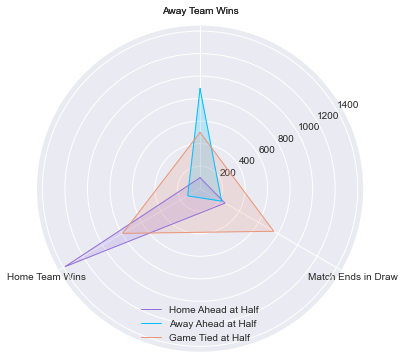

In [41]:
# Setup polar grid for radar plot
angles = np.linspace(0, 2 * np.pi, 3, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each match outcome
for col, color, label in [
    ('HOME', 'mediumpurple', 'Home Ahead at Half'),
    ('AWAY', 'deepskyblue', 'Away Ahead at Half'),
    ('DRAW', 'darksalmon', 'Game Tied at Half')
]:
    values = df.loc[col].tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=1, label=label)
    ax.fill(angles, values, color=color, alpha=0.2)

# Rotate plot and add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), [None, 'Match Ends in Draw', 'Home Team Wins', 'Away Team Wins'])
ax.set_rlabel_position(60)
ax.legend(loc='lower center')
pass

# Radar plot reference: https://www.pythoncharts.com/matplotlib/radar-charts/

From this radar plot, we see that a team ahead at the half will usually go on to win the match. Games tied at the half are largely a tossup. Additionally, from the magnitude of each polygon's extreme point, we note a home team advantage. In this regard, a home team is more likely to win the match despite losing at the half.